#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Loading in both Datasets

In [3]:
df = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


#### Data Cleaning

I found a large number of missing values in 'Lot Frontage'. Hence I later go on to fit a Linear Regression to predict the missing values. The graph below depicts a clear linear relationship.

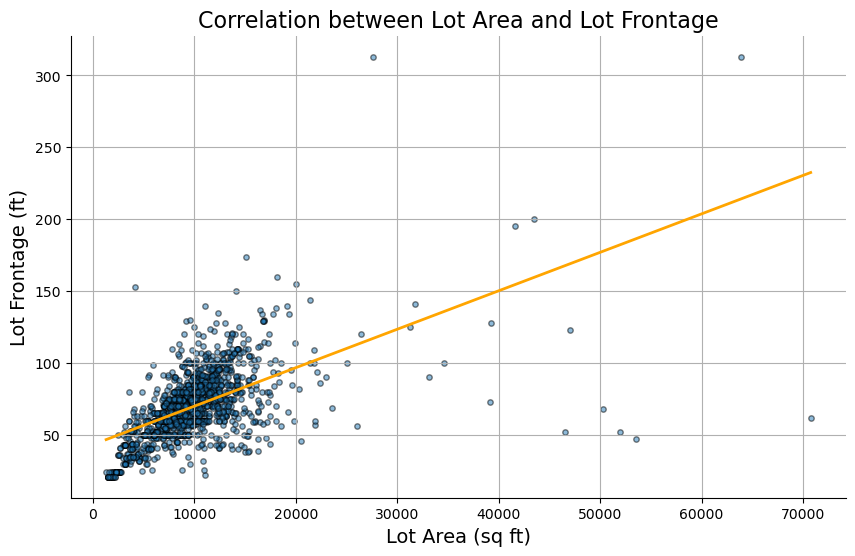

In [4]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Lot Area', y='Lot Frontage', data=df, ci=None, 
            scatter_kws = {'s': 15, 'alpha': 0.5, 'edgecolor':'k'}, 
            line_kws = {'color': 'orange', 'lw': 2})

plt.title('Correlation between Lot Area and Lot Frontage', fontsize=16)
plt.xlabel('Lot Area (sq ft)', fontsize=14)
plt.ylabel('Lot Frontage (ft)', fontsize=14)
plt.grid(True)
sns.despine()
plt.savefig('lot_correlation.png', dpi=300)
plt.show()


In [5]:
def DataCleaner(df):
    
    # Fill missing values in the columns with specified values


    df['Mas Vnr Area'].fillna(0,inplace = True)
    df['Mas Vnr Type'].fillna('None', inplace = True)
    df['Fireplace Qu'].fillna('NA', inplace = True)
    df['Garage Type'].fillna('NA', inplace = True)
    df['Garage Finish'].fillna('NA', inplace = True)
    df['Garage Qual'].fillna('NA', inplace = True)
    df['Garage Cond'].fillna('NA', inplace = True)
    df['Bsmt Qual'].fillna(0, inplace = True)
    df['Bsmt Cond'].fillna(0, inplace = True)
    df['Bsmt Exposure'].fillna(0, inplace = True)
    df['BsmtFin Type 1'].fillna(0, inplace = True)
    df['BsmtFin Type 2'].fillna(0, inplace = True)
    df['Fence'].fillna('NA', inplace = True)
    df['Pool QC'].fillna('NA', inplace = True)
    df['Misc Feature'].fillna('NA', inplace = True)
    df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])

    fill_values = {'Mas Vnr Area': 0, 'Bsmt Qual': 0, 'Bsmt Cond': 0, 'Bsmt Exposure': 0, 
               'BsmtFin Type 1': 0, 'BsmtFin Type 2': 0, 
               'Mas Vnr Type': 'None', 'Fireplace Qu': 'NA', 'Garage Type': 'NA', 
               'Garage Finish': 'NA', 'Garage Qual': 'NA', 'Garage Cond': 'NA', 
               'Fence': 'NA', 'Pool QC': 'NA', 'Misc Feature': 'NA'}

    for column, value in fill_values.items():
        df[column].fillna(value, inplace=True)
        
    # Further handling of missing values in 'Garage Yr Blt'


    df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])
    
    # Drop the rows with missing values in the following columns:
    
    df = df[df['BsmtFin SF 1'].notna()]
    df = df[df['Bsmt Full Bath'].notna()]
    df = df[df['Garage Cars'].notna()]
    
    # Drop the 'Alley' column
    
    df = df.drop('Alley',axis =1)
    
    # Convert categorical variable into dummy variables
    
    
    columns_to_transform = ['Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 
                        'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
                        'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 
                        'Foundation', 'Lot Shape', 'Paved Drive','Bsmt Qual','Bsmt Cond','Bsmt Exposure',
                        'BsmtFin Type 1','BsmtFin Type 2','Heating','Heating QC', 'Electrical','Kitchen Qual',
                        'Functional', 'Central Air','MS Zoning','Land Contour','Utilities','Lot Config',
                        'Land Slope','Street','Fireplace Qu','Garage Type','Garage Finish','Garage Qual',
                        'Garage Cond','Pool QC','Fence','Misc Feature','Sale Type']

    df = pd.get_dummies(data=df, columns=columns_to_transform)
    
    # Fit a linear regression model to predict missing data
    # Fit a KNeighborsClassifier model to predict missing data
    # Fill the NaN values in the original df with the predicted values of the best model
    
    def predict_and_fill(df, target_col, feature_col,n_neighbors=5):
    
    # Selects only rows of df where target_col is not NaN

        not_nan_df = df[df[target_col].notna()]

        model = LinearRegression()
    
     # Set the feature column values as X and the target column values as Y

        X = not_nan_df[feature_col].values.reshape(-1, 1)
        Y = not_nan_df[target_col]
        model.fit(X, Y)
    
     # Predict the values of Y based on X and calculate the Mean Squared Error of the predictions
    
        y_whol_col_pred = model.predict(X)
        MSE = mean_squared_error(Y,y_whol_col_pred)
        #print(f'Model MSE: {MSE}')
    
    # Selects only rows of df where target_col is NaN
             
        is_nan_df = df[df[target_col].isna()]
        X_nan = is_nan_df[feature_col].values.reshape(-1, 1)
    
    
    # Instantiate a KNeighborsClassifier model
    
        model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        model_knn.fit(X, Y)
    
    # Predict the values of Y based on X using the KNN model and calculate the Mean Squared Error of the predictions
    
        y_whol_col_knn_predicted = model_knn.predict(X)
        MSE_knn = mean_squared_error(Y,y_whol_col_knn_predicted)
        #print(f'KNN Model MSE: {MSE_knn}')
    
    
    # Calculate the mean of the target_col values and the Mean Squared Error if all values were replaced by the mean
    
        y_mean = Y.mean()
        y_mean_series = pd.Series([y_mean]*len(Y))
        MSE_mean = mean_squared_error(Y, y_mean_series)
        #print(f'Mean MSE: {MSE_mean}')

    # Fill the NaN values in the original df with the predicted values of the best model
    
        if MSE < MSE_knn and MSE < MSE_mean:
        
            y_nan_predicted = model.predict(X_nan)
            df.loc[df[target_col].isna(), target_col] = y_nan_predicted
        
        elif MSE_knn < MSE and MSE_knn < MSE_mean:
        
            y_nan_predicted = model_knn.predict(X_nan)
            df.loc[df[target_col].isna(), target_col] = y_nan_predicted
            
        else:
            
            df[target_col] = y_whol_col_pred
            
        
    
        return df

    df = predict_and_fill(df, 'Lot Frontage', 'Lot Area')
    
    return df


df = DataCleaner(df)
df_test = DataCleaner(df_test)

While getting dummy variables, I noticed mismatch in dummy variables between the test data and train data. Below I added the missing variables to seach dataset, filled them with zeros and reindexed the datasets to match column indexes. 

In [6]:
missing_columns = list(set(df_test.columns) - set(df.columns))
#for col in missing_columns:
 #       df[col] = 0


In [7]:
df[missing_columns] = 0

In [8]:
missing_columns = set(df.columns) - set(df_test.columns)
missing_columns.discard('SalePrice')

for col in missing_columns:
        df_test[col] = 0



In [9]:
#df_test = df_test.reindex(df.columns, axis=1)
#irrel = df_test.pop('SalePrice')

### Exploratory Data Analysis

#### Numerical features

Sale Price is a right-skewed distribution.

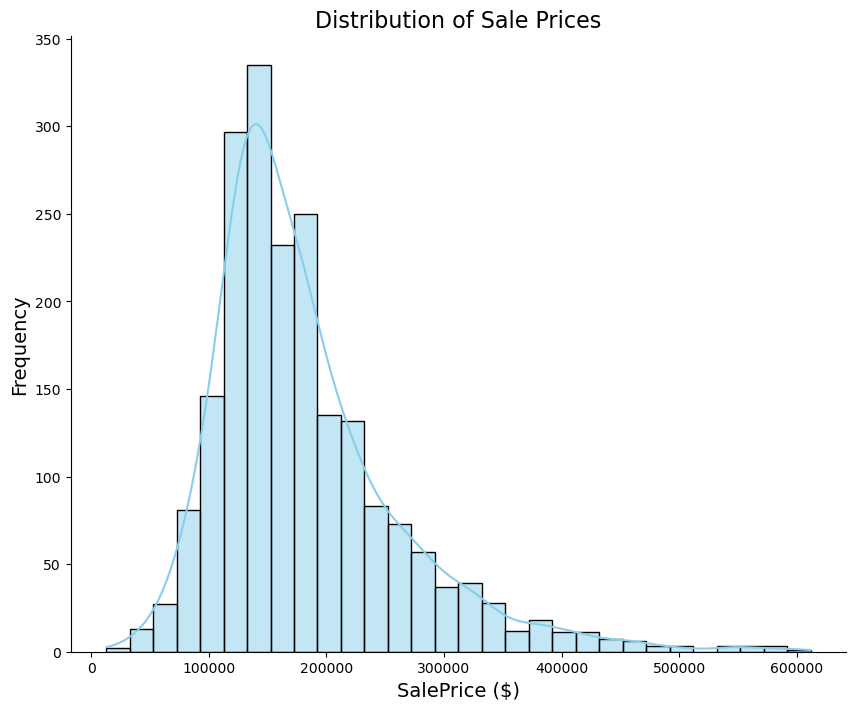

In [12]:
plt.figure(figsize=(10,8)) 
sns.histplot(df['SalePrice'], bins=30, color='skyblue', kde=True)  
plt.xlabel('SalePrice ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Sale Prices', fontsize=16)
sns.despine()
plt.savefig('Dist_sale_price.png', dpi=300);

Here I identitfied the highest correlation numerical features to Sale Price.

In [13]:
corr_ = df.corr()[df.corr()>0.5]['SalePrice'].dropna().sort_values(ascending = False)[1:]
#plt.figure(figsize=(10, 8))
#sns.heatmap(df[corr_.index].corr(), annot=True, cmap='coolwarm', square=True, fmt=".2f")
#plt.title('Heatmap of Correlation')
#plt.savefig('correlation.png', dpi=300)
#plt.show()
corr_

Overall Qual        0.800975
Gr Liv Area         0.698046
Garage Area         0.650000
Garage Cars         0.648103
Total Bsmt SF       0.631507
1st Flr SF          0.621181
Bsmt Qual_Ex        0.586986
Year Built          0.572256
Kitchen Qual_Ex     0.550987
Garage Yr Blt       0.550883
Year Remod/Add      0.550055
Full Bath           0.537369
Foundation_PConc    0.530973
Mas Vnr Area        0.504025
TotRms AbvGrd       0.502909
Name: SalePrice, dtype: float64

Overall Quality and Sale Price have a clear positive relationship

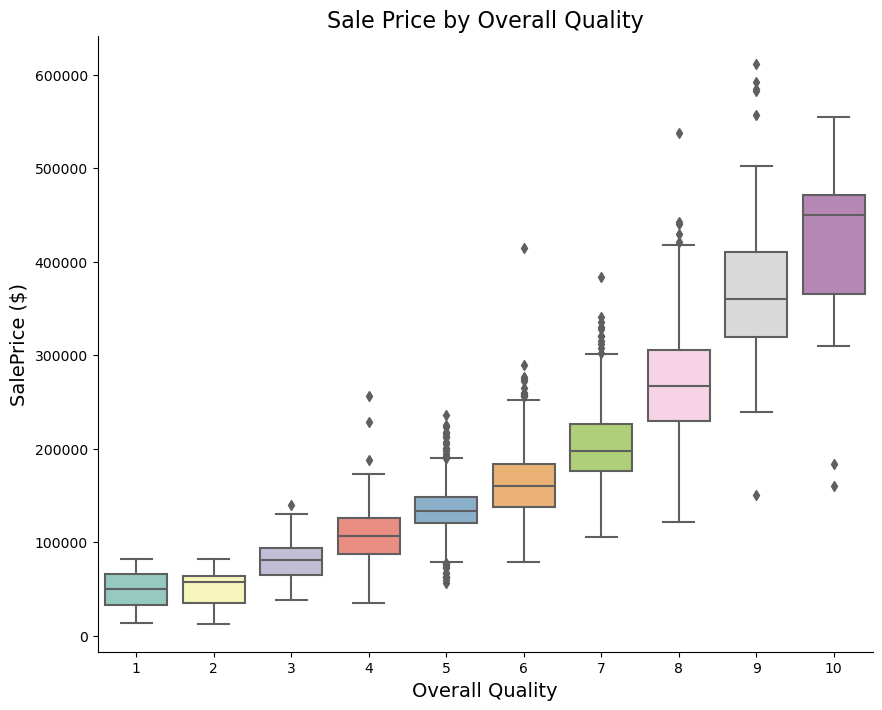

In [14]:
plt.figure(figsize=(10,8)) 

sns.boxplot(x='Overall Qual', y='SalePrice', data=df, palette='Set3')

plt.xlabel('Overall Quality', fontsize=14)
plt.ylabel('SalePrice ($)', fontsize=14)
plt.title('Sale Price by Overall Quality', fontsize=16)
sns.despine()
plt.savefig('Price_vs_Overall_Qual.png', dpi=300)
plt.show()


Visualizing Overall Condition and Overall Quality led me to understand that there is np such correlation between Quality and Condition. I will attempt to adjust for this by taking their interaction term later on.

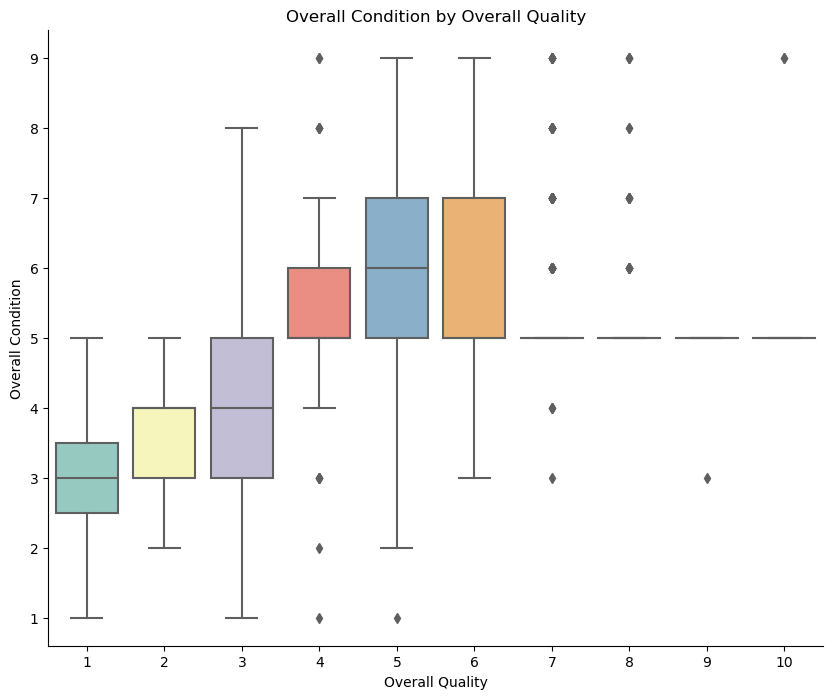

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Overall Qual', y='Overall Cond', data=df, palette='Set3')
plt.xlabel('Overall Quality')
plt.ylabel('Overall Condition')
plt.title('Overall Condition by Overall Quality')
sns.despine()
plt.savefig('Cond_vs_Qual.png', dpi=300)
plt.show()

1st Floor and Above ground square footage have a positive linear relationship with Sale Price. Both also have a high correlation to Sale Price as shown above. However, there are two outliers at the both right with a square footage of greater than 4,000 but a price of less than 300,000. We can deal with these later. 

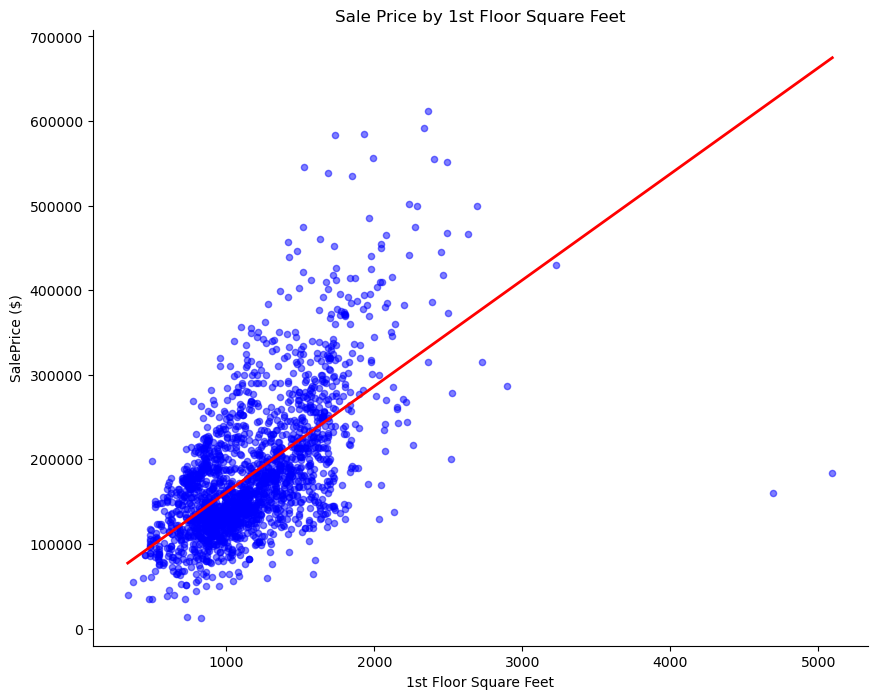

In [16]:
plt.figure(figsize=(10,8))
sns.regplot(x='1st Flr SF', y='SalePrice', data=df, ci=None, 
            scatter_kws = {'s': 20, 'alpha':0.5, 'color':'blue'}, 
            line_kws = {'color': 'red', 'lw':2})
plt.xlabel('1st Floor Square Feet')
plt.ylabel('SalePrice ($)')
plt.title('Sale Price by 1st Floor Square Feet')
sns.despine()
plt.savefig('Price_vs_1stfloor.png', dpi=300)
plt.show()

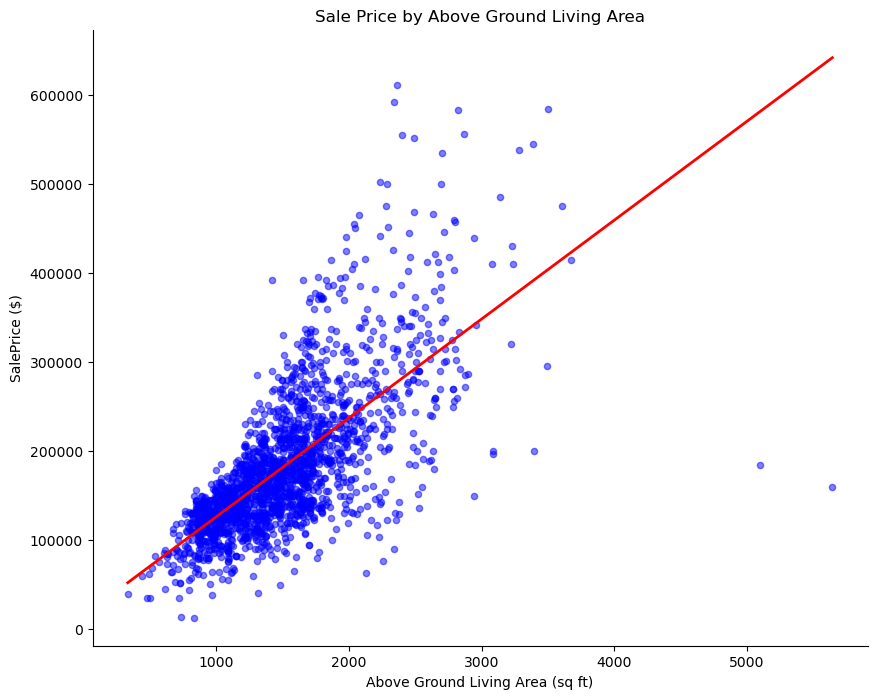

In [17]:
plt.figure(figsize=(10,8))
sns.regplot(x='Gr Liv Area', y='SalePrice', data=df, ci=None, 
            scatter_kws = {'s': 20, 'alpha':0.5, 'color':'blue'}, 
            line_kws = {'color': 'red', 'lw':2})
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('SalePrice ($)')
plt.title('Sale Price by Above Ground Living Area')
sns.despine()
plt.savefig('Price_vs_area.png', dpi=300)
plt.show()

The relationship between Sale Price and 2nd Floor square footage is unclear due to the large number of zeros. We will have to account for this later.

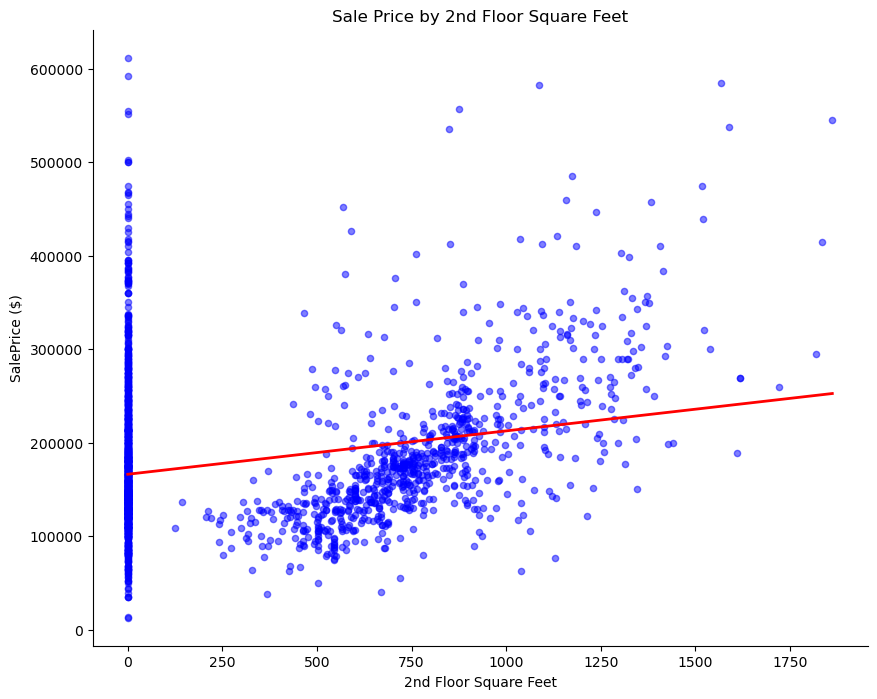

In [18]:
plt.figure(figsize=(10,8))
sns.regplot(x='2nd Flr SF', y='SalePrice', data=df, ci=None, 
            scatter_kws = {'s': 20, 'alpha':0.5, 'color':'blue'}, 
            line_kws = {'color': 'red', 'lw':2})
plt.xlabel('2nd Floor Square Feet')
plt.ylabel('SalePrice ($)')
plt.title('Sale Price by 2nd Floor Square Feet')
sns.despine()
plt.savefig('Price_vs_2ndfloor.png', dpi=300)
plt.show()

Number of Garage Cars and Sale Price seem to have a negative correlation after more than 3 cars.

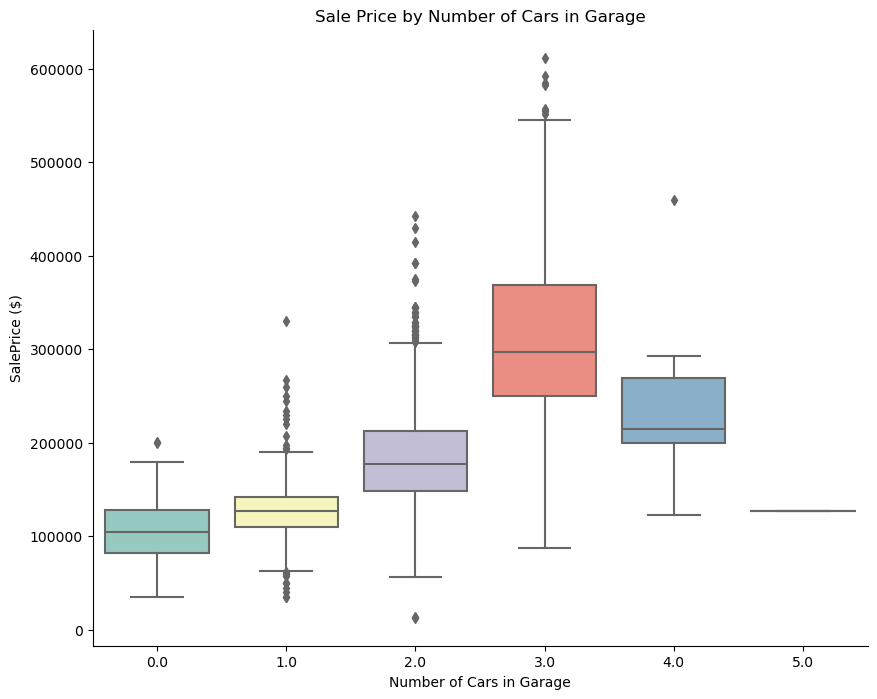

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Garage Cars', y='SalePrice', data=df, palette='Set3', order=sorted(df['Garage Cars'].unique()))
plt.xlabel('Number of Cars in Garage')
plt.ylabel('SalePrice ($)')
plt.title('Sale Price by Number of Cars in Garage')
sns.despine()
plt.savefig('Price_vs_cars.png', dpi=300)
plt.show()

However Garage Area and Sale Price have a postive relationship throughout.

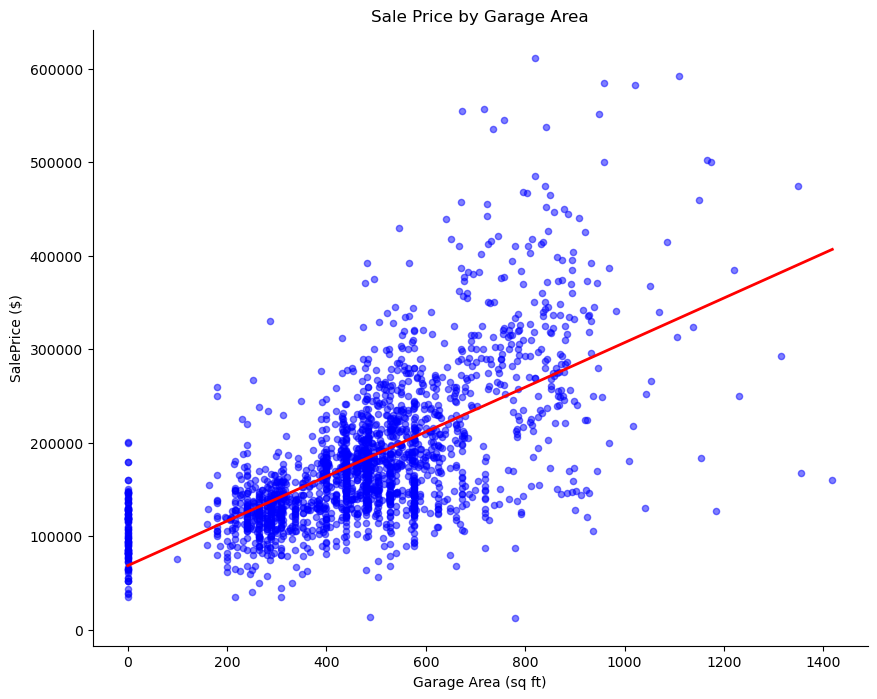

In [20]:
plt.figure(figsize=(10,8))
sns.regplot(x='Garage Area', y='SalePrice', data=df, ci=None, 
            scatter_kws = {'s': 20, 'alpha':0.5, 'color':'blue'}, 
            line_kws = {'color': 'red', 'lw':2})
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('SalePrice ($)')
plt.title('Sale Price by Garage Area')
sns.despine()
plt.savefig('Price_vs_garage.png', dpi=300)
plt.show()

Year Built and Sale Price appear to have an important positive relationship with little spread. There are some outliers of houses built before 1900 with a high Sale Price which we can account for later.

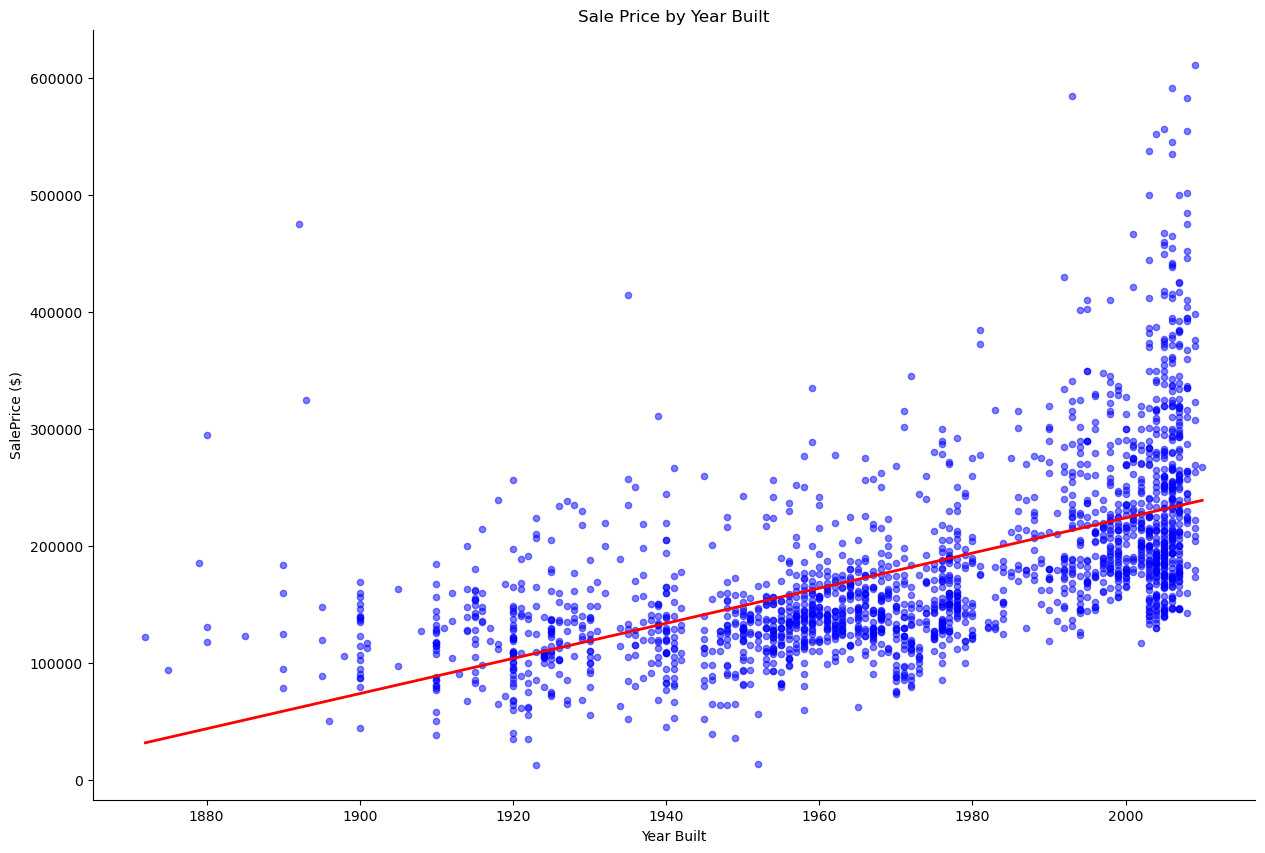

In [21]:
plt.figure(figsize=(15,10))
sns.regplot(x='Year Built', y='SalePrice', data=df, ci=None, 
            scatter_kws = {'s': 20, 'alpha':0.5, 'color':'blue'}, 
            line_kws = {'color': 'red', 'lw':2})
plt.xlabel('Year Built')
plt.ylabel('SalePrice ($)')
plt.title('Sale Price by Year Built')
sns.despine()
plt.savefig('Price_vs_Yearbuilt.png', dpi=300)
plt.show()

#### Catagorical Features

Neighborhoods have a clear relationship with Sale Prices and need to be accounted for.

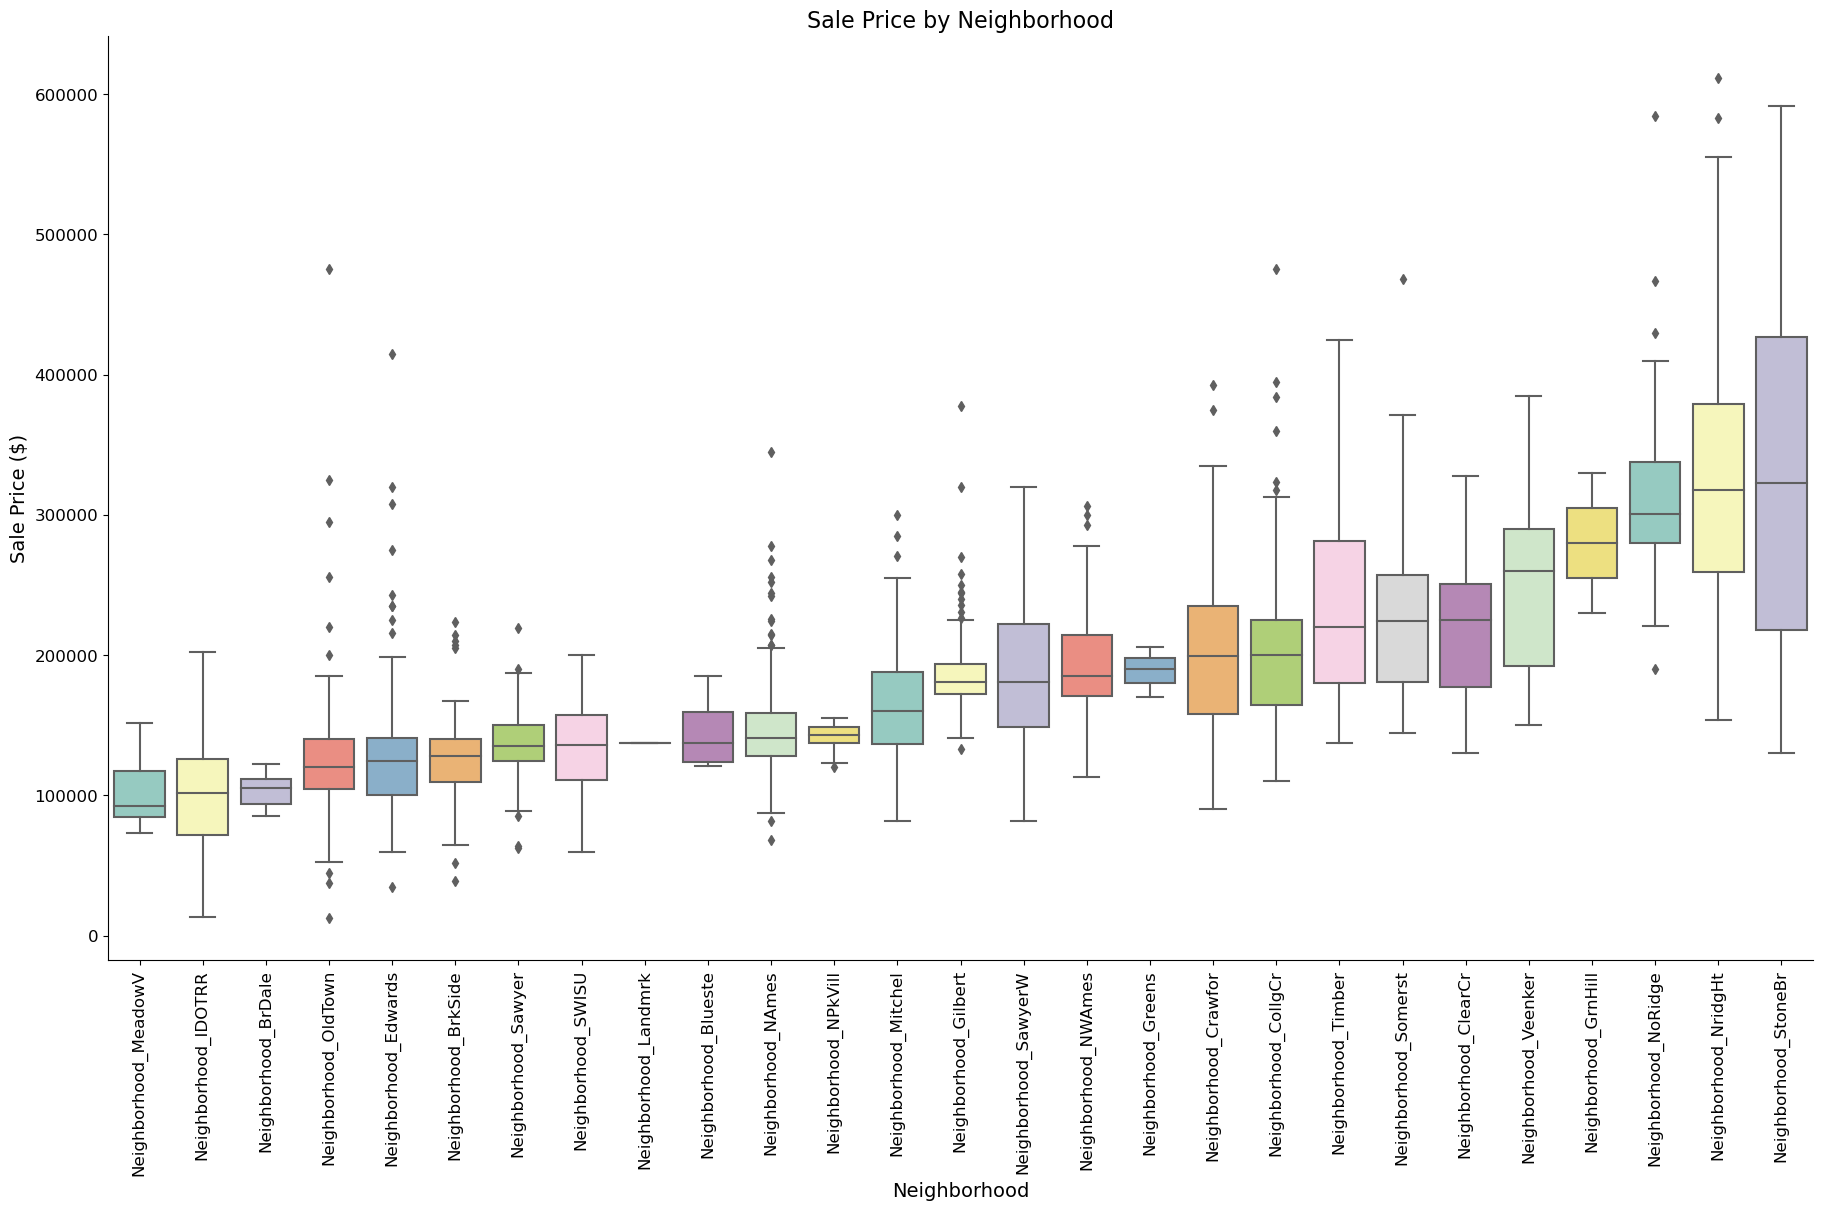

In [22]:
neighborhood_list = ["Neighborhood_Blueste", "Neighborhood_BrDale", "Neighborhood_BrkSide", 
                     "Neighborhood_ClearCr", "Neighborhood_CollgCr", "Neighborhood_Crawfor", 
                     "Neighborhood_Edwards", "Neighborhood_Gilbert", "Neighborhood_Greens", 
                     "Neighborhood_GrnHill", "Neighborhood_IDOTRR", "Neighborhood_Landmrk", 
                     "Neighborhood_MeadowV", "Neighborhood_Mitchel", "Neighborhood_NAmes", 
                     "Neighborhood_NPkVill", "Neighborhood_NWAmes", "Neighborhood_NoRidge", 
                     "Neighborhood_NridgHt", "Neighborhood_OldTown", "Neighborhood_SWISU", 
                     "Neighborhood_Sawyer", "Neighborhood_SawyerW", "Neighborhood_Somerst", 
                     "Neighborhood_StoneBr", "Neighborhood_Timber", "Neighborhood_Veenker"]

def Cat_Col_Organiser(df, target_col, feature_col):
    df_melt = pd.melt(df, id_vars=target_col, value_vars=feature_col)
    df_melt = df_melt[df_melt['value'] == 1]
    median_prices = df_melt.groupby('variable')[target_col].median().sort_values()  
    
    return df_melt, median_prices

df_melt, median_prices = Cat_Col_Organiser(df, 'SalePrice', neighborhood_list)

plt.figure(figsize=(22, 12))
sns.boxplot(x='variable', y='SalePrice', data=df_melt, order=median_prices.index, palette='Set3')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Sale Price ($)', fontsize=14)
plt.title('Sale Price by Neighborhood', fontsize=16)
sns.despine()
plt.savefig('Price_vs_neighborhood.png', dpi=300)
plt.show()

Below are a few other key Catogorical features with a positive correlation to Sale Price. They will need to be accounted for at the time of modeling.

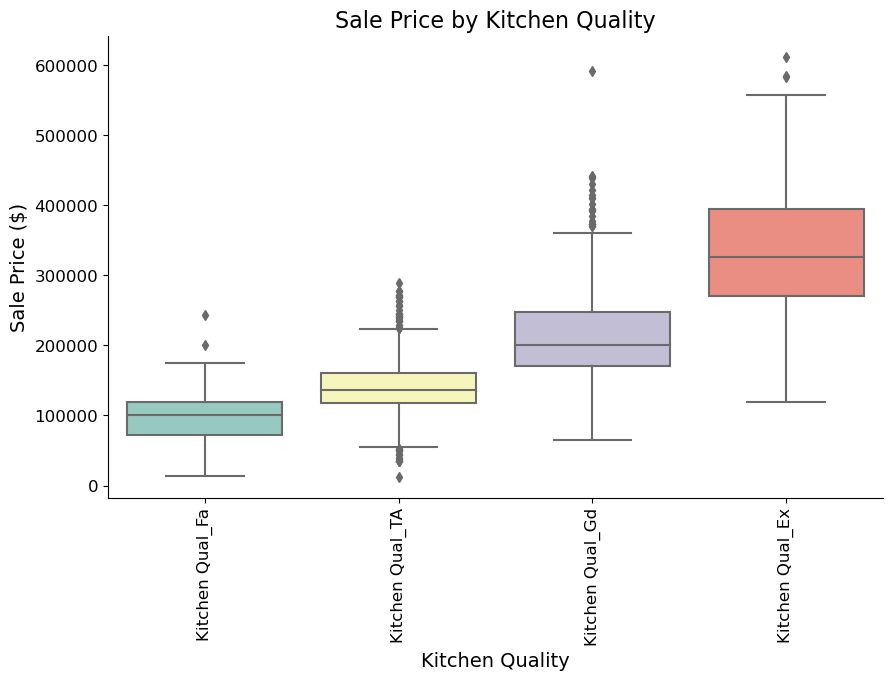

In [23]:
kitchen_qual_list = ["Kitchen Qual_Ex", "Kitchen Qual_Fa", "Kitchen Qual_Gd", "Kitchen Qual_TA"]

df_melt, median_prices = Cat_Col_Organiser(df, 'SalePrice', kitchen_qual_list)

plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='SalePrice', data=df_melt, order=median_prices.index, palette='Set3')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Kitchen Quality', fontsize=14)
plt.ylabel('Sale Price ($)', fontsize=14)
plt.title('Sale Price by Kitchen Quality', fontsize=16)
sns.despine()
plt.savefig('Price_vs_kitchenqual.png', dpi=300)
plt.show()

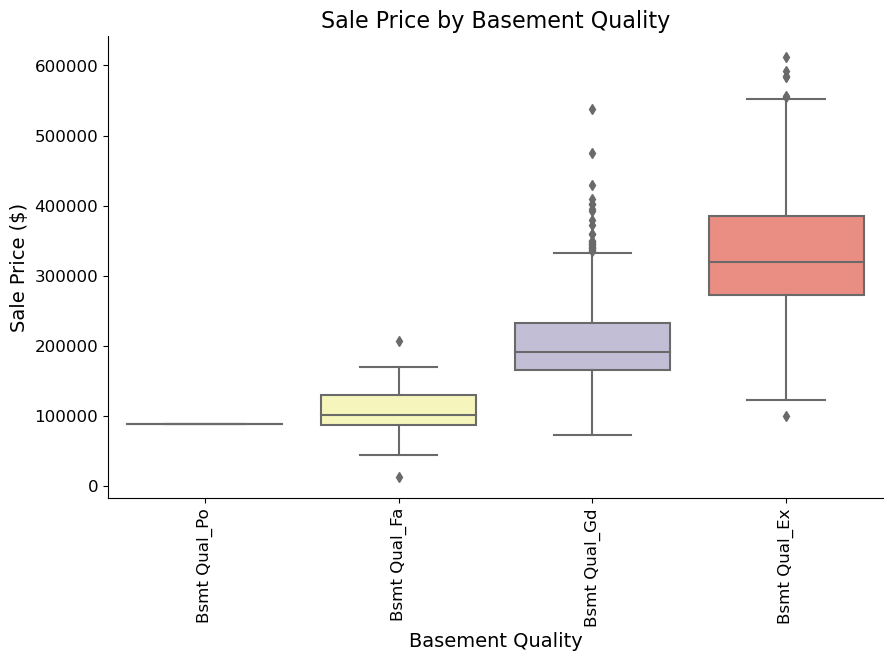

In [24]:
bsmt_qual_list = ["Bsmt Qual_Ex", "Bsmt Qual_Fa", "Bsmt Qual_Gd", "Bsmt Qual_Po"]

df_melt, median_prices = Cat_Col_Organiser(df, 'SalePrice', bsmt_qual_list)

plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='SalePrice', data=df_melt, order=median_prices.index, palette='Set3')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Basement Quality', fontsize=14)
plt.ylabel('Sale Price ($)', fontsize=14)
plt.title('Sale Price by Basement Quality', fontsize=16)
sns.despine()
plt.savefig('Price_vs_basementqual.png', dpi=300)
plt.show()

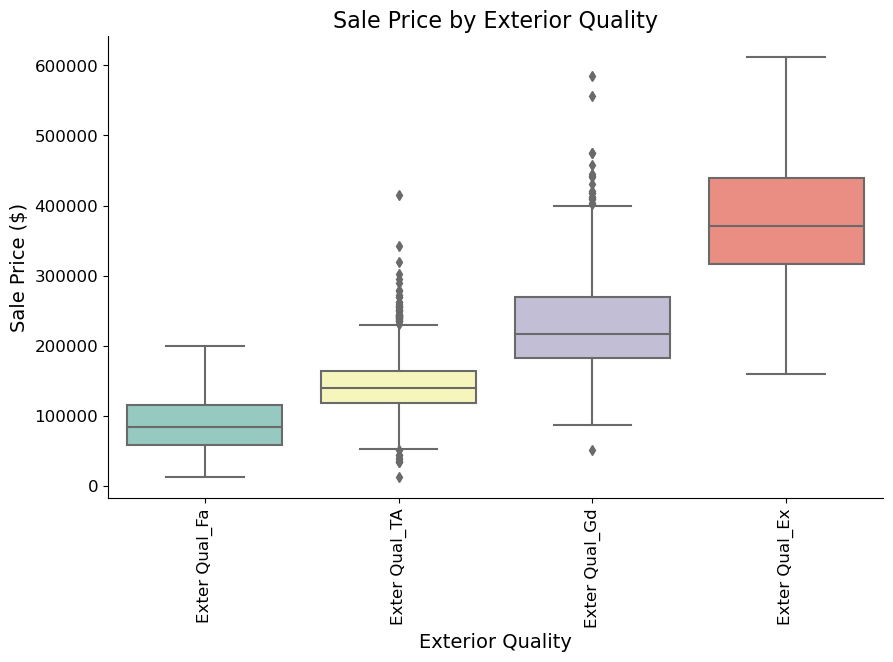

In [25]:
exter_qual_list = ["Exter Qual_Ex", "Exter Qual_Fa", "Exter Qual_Gd", "Exter Qual_TA"]

df_melt, median_prices = Cat_Col_Organiser(df, 'SalePrice', exter_qual_list)

plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='SalePrice', data=df_melt, order=median_prices.index, palette='Set3')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Exterior Quality', fontsize=14)
plt.ylabel('Sale Price ($)', fontsize=14)
plt.title('Sale Price by Exterior Quality', fontsize=16)
sns.despine()
plt.savefig('Prive_vs_extqual.png', dpi=300)
plt.show()

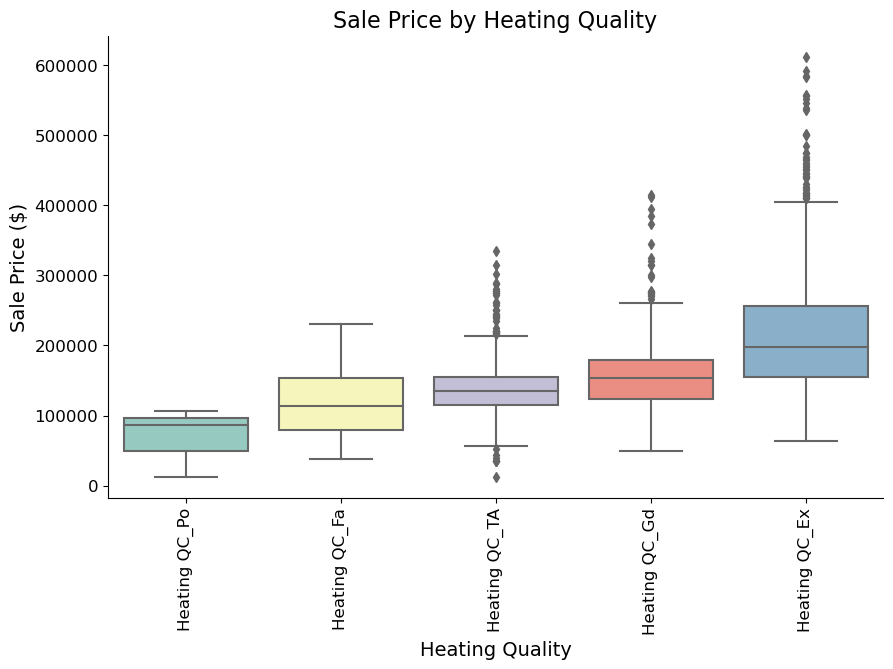

In [26]:
heating_qc_list = ["Heating QC_Ex", "Heating QC_Fa", "Heating QC_Gd", "Heating QC_Po", "Heating QC_TA"]


df_melt, median_prices = Cat_Col_Organiser(df, 'SalePrice', heating_qc_list)

plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='SalePrice', data=df_melt, order=median_prices.index, palette='Set3')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Heating Quality', fontsize=14)
plt.ylabel('Sale Price ($)', fontsize=14)
plt.title('Sale Price by Heating Quality', fontsize=16)
sns.despine()
plt.savefig('Price_vs_heatqual.png', dpi=300)
plt.show()

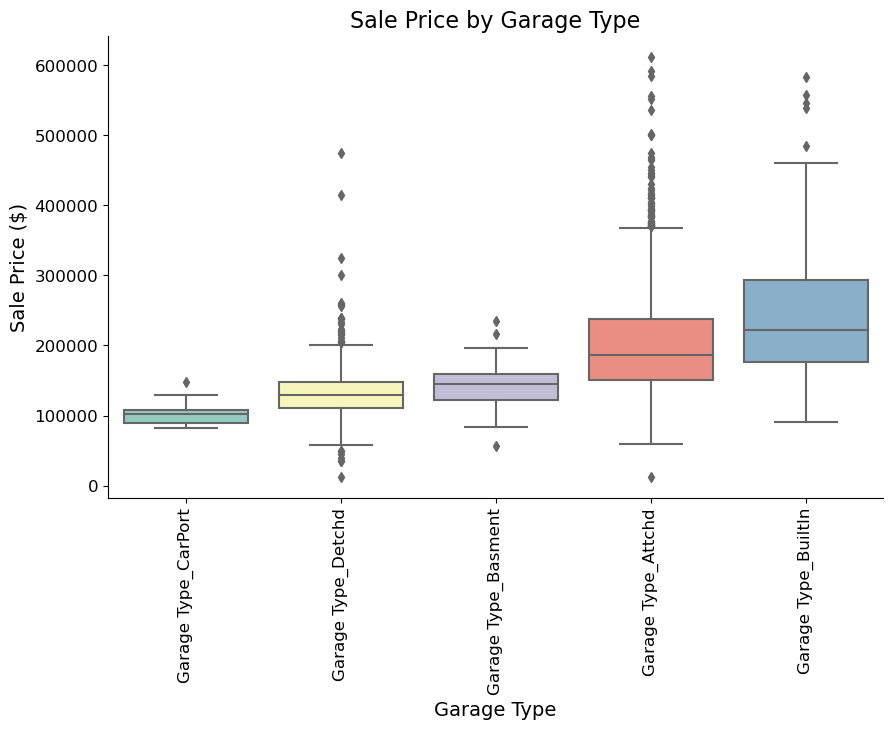

In [27]:
garage_type_list = ["Garage Type_Attchd", "Garage Type_Basment", "Garage Type_BuiltIn", "Garage Type_CarPort", "Garage Type_Detchd"]

df_melt, median_prices = Cat_Col_Organiser(df, 'SalePrice', garage_type_list)

plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='SalePrice', data=df_melt, order=median_prices.index, palette='Set3')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Garage Type', fontsize=14)
plt.ylabel('Sale Price ($)', fontsize=14)
plt.title('Sale Price by Garage Type', fontsize=16)
sns.despine()
plt.savefig('Price_vs_garagetype.png', dpi=300)
plt.show()

#### Dealing with Outliers

Outliers aggresively distort Regression models hence we need to remove them in the modelling proccess to better fit the majority of the data.

I have removed two outliers in 1st Floor square footage below 

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x='1st Flr SF', y='SalePrice', data=df, ci=None, 
            scatter_kws = {'s': 20, 'alpha':0.5, 'color':'blue'}, 
            line_kws = {'color': 'red', 'lw':2})
plt.xlabel('1st Floor Square Feet')
plt.ylabel('SalePrice ($)')
plt.title('Sale Price by 1st Floor Square Feet')
sns.despine()
plt.show()

In [ ]:
df = df.loc[~((df['1st Flr SF'] > 4000) & (df['SalePrice']< 300000))]

I then identified and removed two outliers in Year Built with houses before 1900 being sold for more than 300,000.

In [ ]:
plt.figure(figsize=(15,10))
sns.regplot(x='Year Built', y='SalePrice', data=df, ci=None, 
            scatter_kws = {'s': 20, 'alpha':0.5, 'color':'blue'}, 
            line_kws = {'color': 'red', 'lw':2})
plt.xlabel('Year Built')
plt.ylabel('SalePrice ($)')
plt.title('Sale Price by Year Built')
sns.despine()
plt.show()

In [ ]:
df = df.loc[~((df['Year Built'] < 1900) & (df['SalePrice'] > 300000))]

As Overall Quality has the highest correlation to Sale Price I cleaned the data for modelling by removing one outlier

In [ ]:
plt.figure(figsize=(10,8)) 

sns.boxplot(x='Overall Qual', y='SalePrice', data=df, palette='Set3')

plt.xlabel('Overall Quality', fontsize=14)
plt.ylabel('SalePrice ($)', fontsize=14)
plt.title('Sale Price by Overall Quality', fontsize=16)
sns.despine()

plt.show()

In [ ]:
df = df.loc[~((df['Overall Qual'] == 9) & (df['SalePrice'] < 200000))]

#### Adding Important Columns

Here I created multiple new columns in the training so that the model can better estimate Sale Price. I have added a detailed desrciption of the new columns in the README.

A noteable adding was Total_Sq_Ft which became the highest correlated numerical feature in the dataset. 

In [ ]:
def NewCols(df):

    df['Total_Bathrooms'] = df['Bsmt Full Bath'] +df['Full Bath'] + 0.5*df['Half Bath'] + 0.5*df['Bsmt Half Bath']
    df['Total_Sq_Ft'] = df['1st Flr SF'] + df['2nd Flr SF'] +df['Total Bsmt SF']
    df['Overall_Qual_x_Cond'] = df['Overall Qual'] * df['Overall Cond']
    df['Year_Since_Remod'] = np.where((df['Year Remod/Add'] - df['Year Built'])>0, df['Year Remod/Add'] - df['Year Built'], 2010 - df['Year Built'])
    df['If_Remod'] = np.where(df['Year Remod/Add'] == df['Year Built'], 0,1)
    df['New_Houses'] = np.where(df['Year Built'] == df['Yr Sold'],1,0)
    df['House_Age'] = df['Yr Sold'] - df['Year Built']
    df['Perc_lot_frontage'] = df['Lot Frontage'] / df['Lot Area']
    df['Perc_rooms_is_bedroom'] = df['Bedroom AbvGr']/df['TotRms AbvGrd'] 
    return df

df = NewCols(df)
df_test = NewCols(df_test)

#### Fixing Sale Price Skew

When exploring the data I noticed that the Sale Price was heavily right skewed. Regression models rely on the target column being normally distributed under the LINES assumptions. Hence, here I used a log transformation to reach a more normally distributed column

In [ ]:
df['SalePrice'].skew()

In [ ]:
df['SalePrice'] = np.log1p(df['SalePrice'])
df['SalePrice'].skew()

#### Standard Scaling

As the training data columns were on different scales, I standardized all columns except for 'SalePrice' and 'Id' as these will be needed later. I was also able to perserve the column names for better readability 

In [12]:
def StandardScaling(df):
    
    column_to_exclude = ['SalePrice','Id']
    columns_to_include = [col for col in df.columns if col not in column_to_exclude]


    ct = ColumnTransformer([
    ('sc', StandardScaler(), columns_to_include)
    ], remainder='passthrough')
    
    df[columns_to_include] = ct.fit_transform(df[columns_to_include])

    

    
    return df

df = StandardScaling(df)
df_test = StandardScaling(df_test)


#### Removing Harmful Columns

Here I also removed some columns from the modelling process as they can adversely affect the results. I have provided a describption as to why in the README. 

In [13]:
def Num_to_str(list):
    
    for i in list:
        df[i] = df[i].apply(str)

    return

Num_to_str(['Id','PID','MS SubClass','Mas Vnr Area','Yr Sold'])

#### Modeling

To fit my model I split the training data into a training set and a testing set. I then fir my model it the training set (X_train, y_train) where X_train are all the present numeric columns and y_train is the Sale Price. I found the best score MSE when using a regularized and cross-validated linear (Ridge) regression.  

In [14]:
y = df.pop('SalePrice')
X = df

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 20)

In [16]:
ridge_model = Ridge(alpha=10)
r_alphas = np.logspace(-10, 40, 1000)
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=20)
ridge_cv = ridge_model.fit(X_train, y_train)

Testing for the best Alpha found the optimal alpha to be 10

In [17]:
ridge_cv.alpha

10

In [18]:
ridge_cv.score(X_train, y_train)

0.9407855901257888

In [19]:
ridge_cv.score(X_test, y_test)

0.8260675525529209

Making predictions for testing data based on my model:

In [20]:
y_pred = ridge_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


As the Sale Price was log transformed, I took the expoenential and subtracted one to return to the actual Sale Price 

In [ ]:
y_pred = np.exp(y_pred)-1

Below is the residual plot of the model on X_test data

In [ ]:
resids = y_pred - y_test
sns.histplot(resids,bins = 30, color='skyblue', kde=True)  
plt.xlabel('SalePrice ($) Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Sale Price Error', fontsize=16)
sns.despine()
plt.savefig('resids_plot.png', dpi=300);

#### Output

In [ ]:
df_test['SalePrice'] = y_pred

In [21]:
submission = df_test[['Id','SalePrice']]

KeyError: "['SalePrice'] not in index"

In [ ]:
submission.set_index('Id',inplace=True)

In [22]:
submission.shape

NameError: name 'submission' is not defined

 #### Conclusion

In this project I found exploaratory data analysis and visualization to be the key to better equipting my model. In the EDA process I was able to identift key outliers which could have adversely effected my linear regression model. Furthmore, I was able to pin point high correlation numerical and catogorical features as well as irrelevant feature data which would lowered my model's variance. After testing LassoCV and RidgeCV regularized models, I found that RidgeCV outputed better MSE and r-score values. 

Trying my model on the test subset of the train_data and the test_data confirmed that my model was neither under or overfit. It was outputing r-score of between 0.90 and 0.94. Therefore, the model is well-equipt to handle new data.

**At the time of submission my model recieved a RMSE score of *19832.08715* to Kaggle. This placed me 1st in my General Assemblt cohort. **